# Data Processing

SalesDate
2016-01-04    2
2016-01-11    3
2016-01-18    2
2016-01-25    2
2016-02-01    3
Name: Quantity, dtype: int64


/home/manuel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


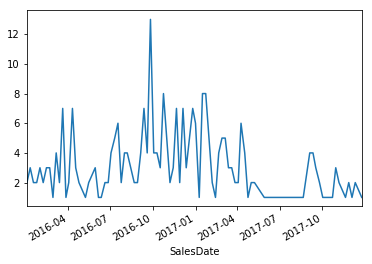

In [1]:
# line plot of time series
from pandas import Series
from matplotlib import pyplot
# load dataset
series = Series.from_csv('Data D.csv', header=0).convert_objects(convert_numeric=True)
# display first few rows
print(series.head(5))
# line plot of dataset
series.plot()
pyplot.show()

# Optimized Persistence Forecast

(90,)
p=1 RMSE:1.988
p=2 RMSE:2.571
p=3 RMSE:2.504
p=4 RMSE:2.231
p=5 RMSE:2.394
p=6 RMSE:2.209
p=7 RMSE:2.632
p=8 RMSE:2.700
p=9 RMSE:2.627
p=10 RMSE:2.802
p=11 RMSE:2.850
p=12 RMSE:2.489
p=13 RMSE:2.632
p=14 RMSE:2.943
p=15 RMSE:3.306
p=16 RMSE:3.036
p=17 RMSE:3.182
p=18 RMSE:3.116
p=19 RMSE:3.331
p=20 RMSE:3.485
p=21 RMSE:3.606
p=22 RMSE:3.787
p=23 RMSE:3.457


/home/manuel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


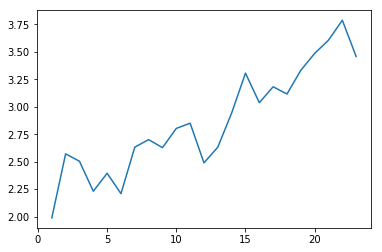

In [13]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
# load data
series = Series.from_csv('Data D.csv', header=0).convert_objects(convert_numeric=True)
# prepare data
X = series.values
print(X.shape)
train, test = X[0:49], X[49:90]
#train, test = X[0:60], X[60:90]


persistence_values = range(1, 24)
scores = list()
for p in persistence_values:
	# walk-forward validation
	history = [x for x in train]
	predictions = list()
	for i in range(len(test)):
		# make prediction
		yhat = history[-p]
		predictions.append(yhat)
		# observation
		history.append(test[i])
	# report performance
	rmse = sqrt(mean_squared_error(test, predictions))
	scores.append(rmse)
	print('p=%d RMSE:%.3f' % (p, rmse))
# plot scores over persistence values
pyplot.plot(persistence_values, scores)
pyplot.show()

/home/manuel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


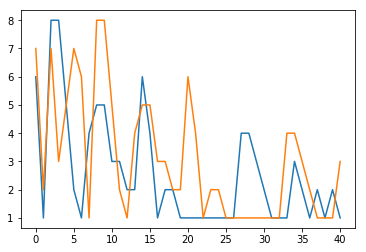

In [14]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
# load data
series = Series.from_csv('Data D.csv', header=0).convert_objects(convert_numeric=True)
# prepare data
X = series.values
train, test = X[0:49], X[49:97]
#train, test = X[0:60], X[60:90]


# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	yhat = history[-6]
	predictions.append(yhat)
	# observation
	history.append(test[i])
# plot predictions vs observations
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()

**This model definetly could be improved**. If there is enough time a better method can be used. 